In [131]:
import os
import json
import numpy as np
import pandas as pd
import seaborn as sns
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications.densenet import DenseNet121, preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.applications.resnet_v2 import ResNet101V2, preprocess_input
from keras.layers import GlobalAveragePooling2D, Dropout, Dense
from sklearn.preprocessing import LabelEncoder
from PIL import Image
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras import layers, models
from keras.models import Model
import tensorflow as tf

Train / Test / Validation Paths

In [116]:
train_dataset_path = "E:/Farhan/DataSet/Train"
test_dataset_path = "E:/Farhan/DataSet/Test"
validation_dataset_path = "E:/Farhan/DataSet/Validation"

In [117]:
# Set the parameters for training
image_size = (224, 224)
batch_size = 16
num_epochs = 5

List of classes 

In [118]:
# Get the list of class names from the training dataset
disease_categories = sorted(os.listdir(train_dataset_path))

# Initialize the label encoder
label_encoder = LabelEncoder()

# Create an image data generator
data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

Generators for loading images

In [119]:
# Create a generator for loading the training data
train_generator = data_generator.flow_from_directory(
    train_dataset_path,  # Path to the training dataset
    target_size = image_size,
    batch_size = batch_size,
    class_mode='categorical',
    shuffle=True
)

Found 3200 images belonging to 8 classes.


In [120]:
# Create a generator for loading the testing data
test_generator = data_generator.flow_from_directory(
    test_dataset_path,  # Path to the testing dataset
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # No need to shuffle the testing data
)


Found 400 images belonging to 8 classes.


In [121]:
# Create a generator for loading the validation data
validation_generator = data_generator.flow_from_directory(
    validation_dataset_path,  # Path to the validation dataset folder
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # No need to shuffle the validation data
)

Found 400 images belonging to 8 classes.


In [122]:
# Get the label mappings from the generator
label_mappings = train_generator.class_indices

# Convert the label mappings to integer labels
integer_labels = label_encoder.fit_transform(list(label_mappings.keys()))

DenseNet

In [111]:
# Load the DenseNet121 pre-trained model without the top layer
base_model = DenseNet121(include_top=False, weights="imagenet", input_shape=(224, 224, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Build the model architecture
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)  # Use the output of the last convolutional layer
x = layers.Dropout(0.5)(x)  # Adding a dropout layer
x = layers.Dense(len(disease_categories), activation="softmax")(x)

model = models.Model(inputs=base_model.input, outputs=x)

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [112]:
# Fit the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    epochs=25,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32
)

Epoch 1/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 93s 847ms/step - accuracy: 0.3898 - loss: 1.9445 - val_accuracy: 0.9844 - val_loss: 0.3417
Epoch 2/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 81s 815ms/step - accuracy: 0.7927 - loss: 0.5914 - val_accuracy: 0.9167 - val_loss: 0.4137
Epoch 3/25


c:\users\smart lab\appdata\local\programs\python\python39\lib\contextlib.py:135: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(type, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7500 - val_loss: 0.9305
Epoch 4/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 82s 820ms/step - accuracy: 0.9027 - loss: 0.3562 - val_accuracy: 1.0000 - val_loss: 0.1135
Epoch 5/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 82s 821ms/step - accuracy: 0.9268 - loss: 0.2551 - val_accuracy: 0.9115 - val_loss: 0.3132
Epoch 6/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6250 - val_loss: 0.9983
Epoch 7/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 82s 818ms/step - accuracy: 0.9449 - loss: 0.1932 - val_accuracy: 1.0000 - val_loss: 0.0601
Epoch 8/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 82s 818ms/step - accuracy: 0.9700 - loss: 0.1379 - val_accuracy: 0.9740 - val_loss: 0.1558
Epoch 9/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9375 - val_loss: 0.3101
Epoch 10/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 82s 817ms/step - accuracy: 0.9631 - l

In [113]:
history_dict = history.history
with open('DenseNet_history.json', 'w') as f:
    json.dump(history_dict, f)
print('history saved successfully!')

history saved successfully!


In [114]:
# Save the trained model
model.save('densenet121_model.h5')
print("Model saved successfully!")

Model saved successfully!


In [115]:
# from tensorflow.keras.models import load_model
# # Load the trained model
# loaded_model = load_model('densenet121_model.h5')
# print("Model loaded successfully!")

ResNet101

In [103]:
# Load the ResNet121 pre-trained model without the top layer
base_model = ResNet101V2(include_top=False, weights="imagenet", input_shape=(224, 224, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Build the model architecture
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)  # Use the output of the last convolutional layer
x = layers.Dropout(0.5)(x)  # Adding a dropout layer
x = layers.Dense(len(disease_categories), activation="softmax")(x)

model = models.Model(inputs=base_model.input, outputs=x)

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

171317808/171317808 ━━━━━━━━━━━━━━━━━━━━ 1444s 8us/step


In [106]:
# Fit the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    epochs=25,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32
)

Epoch 1/25


c:\users\smart lab\appdata\local\programs\python\python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 124s 1s/step - accuracy: 0.4980 - loss: 1.6638 - val_accuracy: 0.9010 - val_loss: 0.2890
Epoch 2/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 114s 1s/step - accuracy: 0.9045 - loss: 0.2998 - val_accuracy: 0.8698 - val_loss: 0.3014
Epoch 3/25


c:\users\smart lab\appdata\local\programs\python\python39\lib\contextlib.py:135: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(type, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.8794
Epoch 4/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 115s 1s/step - accuracy: 0.9419 - loss: 0.1754 - val_accuracy: 0.9740 - val_loss: 0.1039
Epoch 5/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 112s 1s/step - accuracy: 0.9538 - loss: 0.1353 - val_accuracy: 0.9531 - val_loss: 0.1696
Epoch 6/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9375 - val_loss: 0.2731
Epoch 7/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 112s 1s/step - accuracy: 0.9744 - loss: 0.0857 - val_accuracy: 0.9740 - val_loss: 0.0889
Epoch 8/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 115s 1s/step - accuracy: 0.9673 - loss: 0.0917 - val_accuracy: 0.9688 - val_loss: 0.1116
Epoch 9/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.1620
Epoch 10/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 112s 1s/step - accuracy: 0.9662 - loss: 0.0

In [107]:
history_dict = history.history
with open('restNet_history.json', 'w') as f:
    json.dump(history_dict, f)
print('history saved successfully!')

history saved successfully!


In [108]:
# Save the trained model
model.save('resNet_model.h5')

print("Model saved successfully!")

Model saved successfully!


VGG16

In [132]:
#Load the VGG16 pre-trained model without the top layer
base_model = VGG16(include_top=False, weights="imagenet", input_shape=(224, 224, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Build the model architecture
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Use the output of the last convolutional layer
x = Dropout(0.5)(x)  # Adding a dropout layer
x = Dense(len(disease_categories), activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=x)

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [133]:
# Fit the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    epochs=25,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32
)

Epoch 1/25


c:\users\smart lab\appdata\local\programs\python\python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 114s 1s/step - accuracy: 0.1645 - loss: 2.1880 - val_accuracy: 0.5833 - val_loss: 1.6734
Epoch 2/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 115s 1s/step - accuracy: 0.4657 - loss: 1.6473 - val_accuracy: 0.7292 - val_loss: 1.4344
Epoch 3/25


c:\users\smart lab\appdata\local\programs\python\python39\lib\contextlib.py:135: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(type, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0625 - val_loss: 1.9090
Epoch 4/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 115s 1s/step - accuracy: 0.6616 - loss: 1.3219 - val_accuracy: 0.8646 - val_loss: 1.1574
Epoch 5/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 116s 1s/step - accuracy: 0.7494 - loss: 1.1318 - val_accuracy: 0.7969 - val_loss: 1.1001
Epoch 6/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 1.9458
Epoch 7/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 115s 1s/step - accuracy: 0.7989 - loss: 0.9947 - val_accuracy: 0.9479 - val_loss: 0.8719
Epoch 8/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 115s 1s/step - accuracy: 0.7959 - loss: 0.8940 - val_accuracy: 0.8177 - val_loss: 0.9127
Epoch 9/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 1.8193
Epoch 10/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 119s 1s/step - accuracy: 0.8404 - l

In [134]:
history_dict = history.history
with open('VGG16_history.json', 'w') as f:
    json.dump(history_dict, f)
print('history saved successfully!')

history saved successfully!


In [135]:
# Save the trained model
model.save('VGG16_model.h5')

print("Model saved successfully!")

Model saved successfully!


In [136]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

# Make predictions on the test set
predictions = model.predict(test_generator)
predicted_classes = tf.argmax(predictions, axis=1)

# Get the true labels
true_classes = test_generator.classes

25/25 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.7953 - loss: 0.5592
Test Accuracy: 80.00%
Test Loss: 0.5607
25/25 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step


                  precision    recall  f1-score   support

     Anthracnose       0.71      0.54      0.61        50
Bacterial Canker       1.00      1.00      1.00        50
  Cutting Weevil       1.00      1.00      1.00        50
        Die Back       0.83      0.88      0.85        50
      Gall Midge       0.82      0.84      0.83        50
         Healthy       0.56      1.00      0.72        50
  Powdery Mildew       0.84      0.94      0.89        50
     Sooty Mould       0.77      0.20      0.32        50

        accuracy                           0.80       400
       macro avg       0.82      0.80      0.78       400
    weighted avg       0.82      0.80      0.78       400



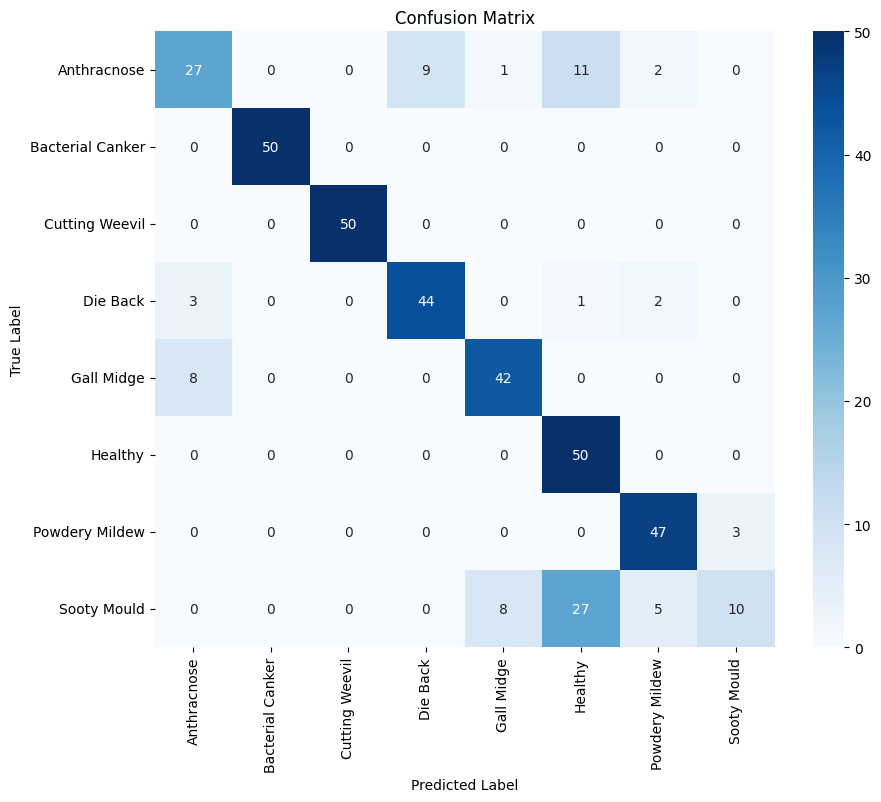

In [137]:

# Classification report
from sklearn.metrics import classification_report

report = classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys())
print(report)

# Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
